# Estudo da Prestação de Contas dos Recursos Captados nas Eleições de 2022 no Paraná

O objetivo do presente estudo é obter insights relevantes após analisar os dados públicos de prestação de contas dos partidos políticos durante as eleições de 2022 no estado do Paraná.

**Fonte dos Dados: ** https://dados.gov.br/dados/conjuntos-dados/dadosabertos-tse-jus-br-dataset-prestacao-de-contas-eleitorais-2022

Nos dados utilizados, constam prestação de contas sobre arrecação de dinheiro e como ele foi gasto. A semântica e clareza dos insights vai depender da qualidade e veracidade da fonte de dados.

Ao término desse estudo pretende-se responder algumas perguntas:

- Qual o valor total captado e gasto pelos partidos?
- Qual partido mais captou dinheiro no período eleitoral?
- Qual partido menos captou dinheiro no período eleitoral?
- Existem partido(s) que não prestaram contas de como gastaram o dinheiro?
- Existem insights importantes sobre como o dinheiro foi gasto?

## Lendo dados de Receitas e Despesas

In [2]:
import pandas as pd

receitas = pd.read_csv('receitas_candidatos_2022_PR.csv', encoding='latin1', sep=';', parse_dates=['DT_GERACAO','HH_GERACAO','DT_PRESTACAO_CONTAS','DT_RECEITA'], dayfirst=True, decimal=',', thousands='.')
despesas = pd.read_csv('despesas_contratadas_candidatos_2022_PR.csv', encoding='latin1', sep=';', parse_dates=['DT_GERACAO','HH_GERACAO','DT_PRESTACAO_CONTAS','DT_DESPESA'], dayfirst=True, decimal=',', thousands='.')

## Receitas x Despesas Gerais

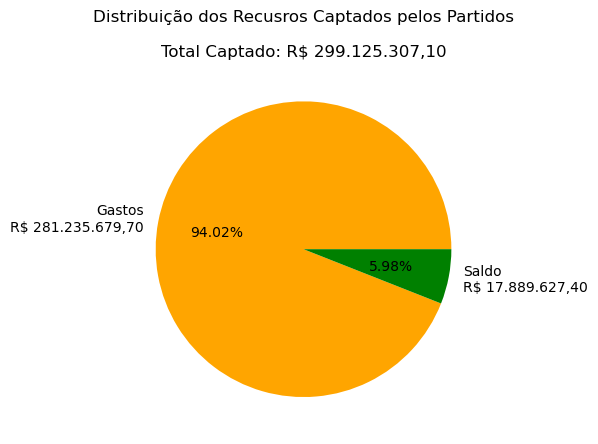

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import locale
    
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

receitas_total = np.sum(receitas['VR_RECEITA'])
despesas_total = np.sum(despesas['VR_DESPESA_CONTRATADA'])
saldo_total = receitas_total - despesas_total

valores = [despesas_total, saldo_total]
labels = [
    'Gastos\n' + str( locale.currency(despesas_total, grouping=True) ),
    'Saldo\n' + str( locale.currency(saldo_total, grouping=True) )
]
colors = ['orange','green']

plt.title( 'Distribuição dos Recusros Captados pelos Partidos\n\nTotal Captado: ' + str( locale.currency(receitas_total, grouping=True)) )
plt.pie(valores, labels=labels, colors=colors, autopct='%1.2f%%')

plt.show()


Nota-se que o valor total captado foi de pouco mais de 299 milhões, enquanto que se gastou 281 milhões (94,02% do total captado), o que resulta em um valor não gasto na ordem de quase 18 milhões (5,98% do total captado).

## Receitas x Despesas por Partido

In [5]:
def formatar_moeda(valor):
    return locale.currency(valor, grouping=True)
    
receitas_partido = receitas[['NM_PARTIDO','VR_RECEITA']].groupby('NM_PARTIDO').sum().sort_values(by='VR_RECEITA', ascending=False)
despesas_partido = despesas[['NM_PARTIDO','VR_DESPESA_CONTRATADA']].groupby('NM_PARTIDO').sum().sort_values(by='VR_DESPESA_CONTRATADA', ascending=False)

fluxos_partidos = pd.merge(receitas_partido, despesas_partido, on='NM_PARTIDO')
fluxos_partidos['VR_SALDO'] = fluxos_partidos['VR_RECEITA'] - fluxos_partidos['VR_DESPESA_CONTRATADA']
fluxos_partidos['PERCENTUAL_SALDO'] = round(fluxos_partidos['VR_SALDO'] / fluxos_partidos['VR_RECEITA'] * 100, 2)
fluxos_partidos = fluxos_partidos.sort_values(by='VR_RECEITA', ascending=False)

fluxos_partidos['RECEITAS'] = fluxos_partidos['VR_RECEITA'].apply(formatar_moeda)
fluxos_partidos['DESPESAS'] = fluxos_partidos['VR_DESPESA_CONTRATADA'].apply(formatar_moeda)
fluxos_partidos['SALDO'] = fluxos_partidos['VR_SALDO'].apply(formatar_moeda)

display(fluxos_partidos[['RECEITAS','DESPESAS','SALDO','PERCENTUAL_SALDO']])

,RECEITAS,DESPESAS,SALDO,PERCENTUAL_SALDO
NM_PARTIDO,,,,
Partido Social Democrático,"R$ 53.994.108,36","R$ 52.620.312,30","R$ 1.373.796,06",2.54
UNIÃO BRASIL,"R$ 35.781.658,57","R$ 32.852.301,64","R$ 2.929.356,93",8.19
PROGRESSISTAS,"R$ 35.390.964,73","R$ 34.864.855,17","R$ 526.109,56",1.49
Partido dos Trabalhadores,"R$ 22.209.688,42","R$ 21.317.335,98","R$ 892.352,44",4.02
Movimento Democrático Brasileiro,"R$ 17.729.027,52","R$ 16.894.372,27","R$ 834.655,25",4.71
Partido Liberal,"R$ 17.278.921,36","R$ 16.759.883,92","R$ 519.037,44",3.00
Partido Republicano da Ordem Social,"R$ 16.785.329,23","R$ 15.675.680,20","R$ 1.109.649,03",6.61
Podemos,"R$ 15.673.984,95","R$ 14.064.294,13","R$ 1.609.690,82",10.27
REPUBLICANOS,"R$ 14.406.577,40","R$ 13.765.211,62","R$ 641.365,78",4.45


Nota-se que o **Partido Social Democrático** com valor de R$ 53.994.108,36 (milhões) foi o que mais captou recursos, enquanto o menos captou foi o **Partido Socialista dos Trabalhadores Unificado**. Não podemos obter insights apenas com essas informações já que o partido que menos captou dinheiro, também deixou de prestar contas de 12,39% do valor total captado. No entanto, isso levanta uma questão importante:

**Para todos os partidos, o valor de despesas na prestação contas, foi o mesmo valor das receitas arrecadas? Ou seja, os partidos prestaram contas de todo o dinheiro arrecadado?**

Para tentar responder a questão, a próxima listagem mostra o **saldo e percentual de saldo** de cada partido.

In [6]:
fluxos_partidos = fluxos_partidos.sort_values(by='PERCENTUAL_SALDO', ascending=False)
display(fluxos_partidos[['RECEITAS','DESPESAS','SALDO','PERCENTUAL_SALDO']])

,RECEITAS,DESPESAS,SALDO,PERCENTUAL_SALDO
NM_PARTIDO,,,,
Partido da Causa Operária,"R$ 48.363,64","R$ 0,00","R$ 48.363,64",100.00
Rede Sustentabilidade,"R$ 2.788.285,92","R$ 1.544.448,57","R$ 1.243.837,35",44.61
Solidariedade,"R$ 8.367.722,57","R$ 6.222.528,30","R$ 2.145.194,27",25.64
Partido da Mulher Brasileira,"R$ 352.594,36","R$ 274.022,51","R$ 78.571,85",22.28
AGIR,"R$ 1.273.068,04","R$ 1.109.934,69","R$ 163.133,35",12.81
Partido Trabalhista Brasileiro,"R$ 3.738.782,75","R$ 3.265.624,17","R$ 473.158,58",12.66
Partido Socialista dos Trabalhadores Unificado,"R$ 4.042,00","R$ 3.541,00","R$ 501,00",12.39
Podemos,"R$ 15.673.984,95","R$ 14.064.294,13","R$ 1.609.690,82",10.27
Partido Comunista do Brasil,"R$ 330.292,10","R$ 297.745,91","R$ 32.546,19",9.85


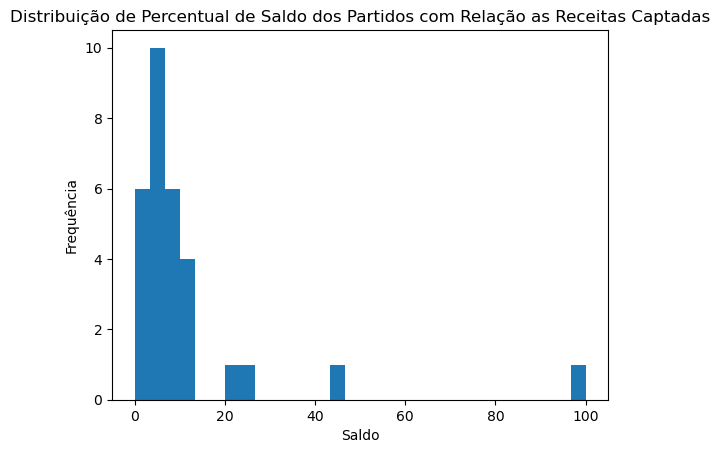

In [7]:
plt.hist(fluxos_partidos['PERCENTUAL_SALDO'], bins=30)
plt.title('Distribuição de Percentual de Saldo dos Partidos com Relação as Receitas Captadas')
plt.ylabel('Frequência')
plt.xlabel('Saldo')
plt.show()

**Na tabela e gráfico acima alguns pontos chamam atenção:**

- Pelo menos **um partido não prestou contas** de como gastou as receitas arrecadas
- Pelo menos **um partido prestou contas** de 100% de como gastou as receitas arrecadadas
- A maioria dos partidos ficaram com **saldo positivo** quando se diminui o valor das receitas pelos valores de despesas na prestação de contas;
- No grafico de distribuição de frequências dos saldos dos partidos, nota-se que a grande maioria dos partidos teve saldo entre 0 e 15%, uma pequena parcela dos partidos ficou com saldo positivo de 20 a 30% e outra pequena parte com saldo de 40 a 100%.
- Interessante destacar que mesmo o **Partido Socialista dos Trabalhadores Unificado** tendo sido o que menos captou dinheiro, **apresenta saldo positivo quando se aplica Receitas - Despesas**, e com isso, aparece em Sétimo colocado na tabela acima
- Por outro lado, interessante destacar também que o partido que mais captou dinheiro, o **Partido Social Democratico** aparece na parte final da tabela com **saldo positido de 2,54% em relação a receita total captada**
- Após analisar os dados e observar o gráfico de frequências, nota-se que **por padrão majoritário, os partidos possuem saldo positivo nessa prestação de contas**, o que significa que não gastaram todas as receitas captadas. Assim sendo por qual razão a maioria dos partidos ficaram com saldo positivo ao término do pleito eleitoral?
      (Pergunta não pode ser respondida apenas com os dados, é uma pergunta para reflexão, precisamos buscar entender negocialmente porque a maioria
      dos partidos deixou de prestar contas de alguma porcentagem de toda receita arrecadada no período eleitoral)

Vamos continuar examinando os dados e aos poucos buscar consoldar o presente estudo.

## Detalhando Fontes de Receitas dos Partidos

In [8]:
def formatar_moeda(valor):
    return locale.currency(valor, grouping=True)
    
fontes_receitas = receitas[['DS_FONTE_RECEITA','VR_RECEITA']].groupby('DS_FONTE_RECEITA').sum()
fontes_receitas['RECEITA'] = fontes_receitas['VR_RECEITA'].apply(formatar_moeda)

receitas.isnull().sum()
# print(receitas['DS_CARGO'].unique())
# print(receitas['NM_CANDIDATO'])

DT_GERACAO                        0
HH_GERACAO                        0
ANO_ELEICAO                       0
CD_TIPO_ELEICAO                   0
NM_TIPO_ELEICAO                   0
CD_ELEICAO                        0
DS_ELEICAO                        0
DT_ELEICAO                        0
ST_TURNO                          0
TP_PRESTACAO_CONTAS               0
DT_PRESTACAO_CONTAS               0
SQ_PRESTADOR_CONTAS               0
SG_UF                             0
SG_UE                             0
NM_UE                             0
NR_CNPJ_PRESTADOR_CONTA           0
CD_CARGO                          0
DS_CARGO                          0
SQ_CANDIDATO                      0
NR_CANDIDATO                      0
NM_CANDIDATO                      0
NR_CPF_CANDIDATO                  0
NR_CPF_VICE_CANDIDATO             0
NR_PARTIDO                        0
SG_PARTIDO                        0
NM_PARTIDO                        0
CD_FONTE_RECEITA                  0
DS_FONTE_RECEITA            